In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl


from keras.datasets import mnist
(train_X, train_y), (test_X, test_y) = mnist.load_data()


In [2]:
print(train_X.shape)

(60000, 28, 28)


In [150]:
# (a) Do SVD analysis
train_digits_X = train_X.reshape(60000, 784)
test_digits_X = test_X.reshape(10000, 784)
U, S, VT = np.linalg.svd(train_digits_X, full_matrices=False)
U1, S1, VT1 = np.linalg.svd(test_digits_X, full_matrices=False)
print(train_digits_X.shape)

(60000, 784)


Text(0.5, 1.0, 'Singular Value Spectrum for Training Data')

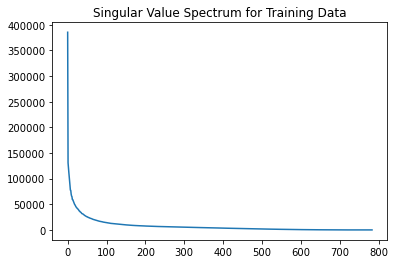

In [151]:
# (b) Singular Value Spectrum and how many nodes are necessary?

plt.figure()
plt.plot(S)
plt.imshow
plt.title('Singular Value Spectrum for Training Data')


Text(0.5, 1.0, 'Singular Value Spectrum for Testing Data')

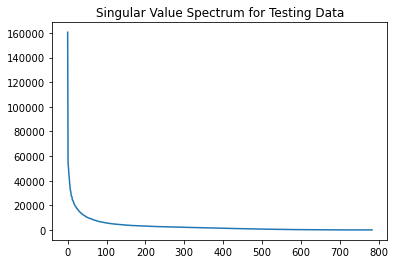

In [152]:
plt.figure()
plt.plot(S1)
plt.imshow
plt.title('Singular Value Spectrum for Testing Data')


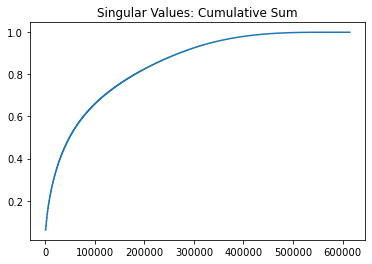

55
 rank =  55 is enough to reconstruct the data


In [153]:
plt.figure(3)
plt.plot(np.cumsum(np.diag(S))/np.sum(np.diag(S)))
plt.title('Singular Values: Cumulative Sum')
plt.show()
#print(S[:10])
#print(S.shape)
#list = np.cumsum(S)/np.sum(np.diag(S))

list =[]
for k in range(784):
    #val = np.cumsum(S)/np.sum(S)

    val = np.linalg.norm(S[:k])/np.linalg.norm(S)
    
    list.append(val)
#print(list[1:20])
cutoff = []
    
mylist = next(k for k, value in enumerate(list)
             if value > 0.95)
print(mylist)
print(" rank = ", mylist, 'is enough to reconstruct the data')


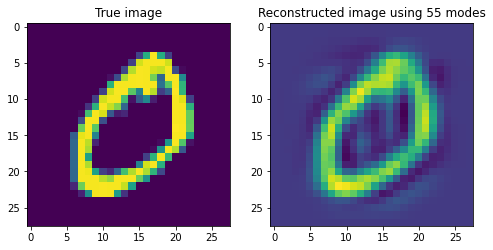

In [157]:
f, ax = plt.subplots(1,2,figsize=(8,8))
ax[0].imshow(train_digits_X[1].reshape(28,28))
ax[0].set_title('True image')
ax[1].imshow((U[:,:mylist]@np.diag(S)[:mylist,:mylist]@VT[:mylist,:])[1].reshape(28,28))
ax[1].set_title('Reconstructed image using '+ str(mylist)+ ' modes');


In [158]:
# Interpretation of U, S, V = M


# U is the singular vectors of matrix M. It contains the orthogonal basis vectors.
# S is the singular values and represents the scaling factor of the singular vectors from U. 
# V matrix represents the importance of each feature to an individual image.

(60000, 784)
(784, 60000)


ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 60000 is different from 784)

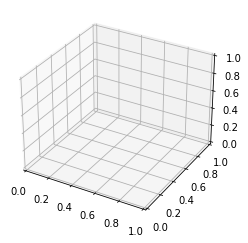

In [167]:
# d) project on te selected V modes colored by their digit label
print(train_digits_X.shape)
train_data = train_digits_X.T
print(train_data.shape)

fig1 = plt.figure()
ax = fig1.add_subplot(111, projection = '3d')
#ax.scatter(VT[1,2],VT[1,3],VT[1,5],c='r',marker='o',s=20)
#ax.scatter(VT[2,2],VT[2,3],VT[2,5],c='r',marker='o',s=20)

for k in range(5000):
    x = VT[1,:]@train_data[:,k]
    y = VT[3,:]@np.transpose(train_data[k])
    z = VT[5,:]@np.transpose(train_data[k])
    
    if train_y[k] ==1:
        ax.scatter(x,y,z, marker='.', color='r', s=20)
    if train_y[k] ==3:
        ax.scatter(x,y,z, marker='.', color='g', s=20)
    if train_y[k] ==5:
        ax.scatter(x,y,z, marker='.', color='b', s=20)
plt.show()


In [133]:
print(train_digits_X.shape)
print(train_data[2].shape)
print(train_X.shape)

print(VT[:,2].shape)

(784, 60000)
(784,)
(60000, 28, 28)
(784,)
